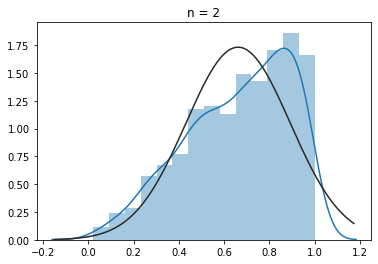

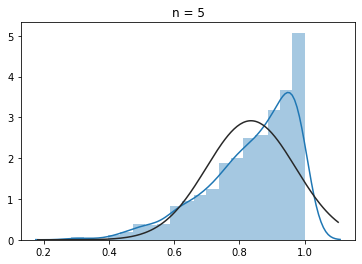

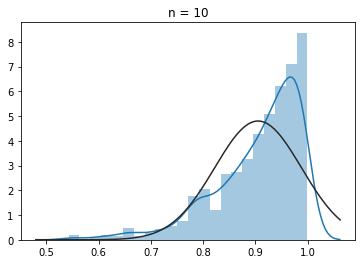

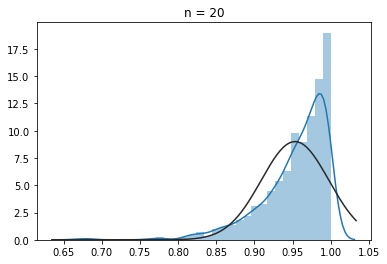

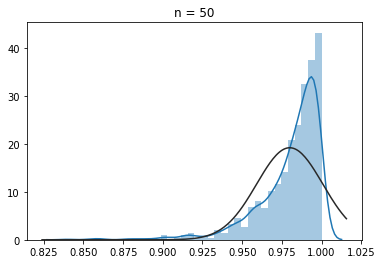

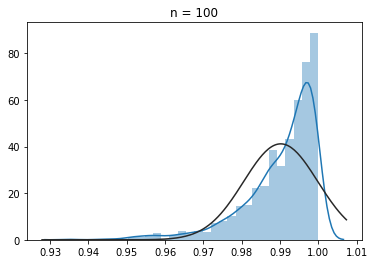

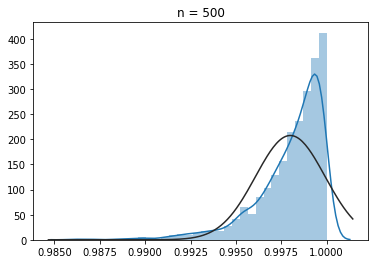

In [2]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
TETA = 1

#1) Построить гистограммы (смоделировав по 1000 реализаций) для X(n) при и сравнить с нормальной плотностью.
#сгенерируем выборку из распрелеления с плотностью (n*x**(n-1))/(TETA**n), распределение максимума n ~ U(0, TETA)
class uni_max_gen(sps.rv_continuous):
    def _pdf(self, x, n):
        return (n*x**(n-1))/(TETA**n)
uni_max = uni_max_gen(a=0, b=TETA, name='uni_max')

n_tup = (2, 5, 10, 20, 50, 100, 500)
sample = uni_max.rvs(2, size=100)

for n in n_tup:
    sample = uni_max.rvs(n, size=1000)
    sns.distplot(sample, fit=sps.norm)
    plt.title('n = ' + str(n))
    plt.show()

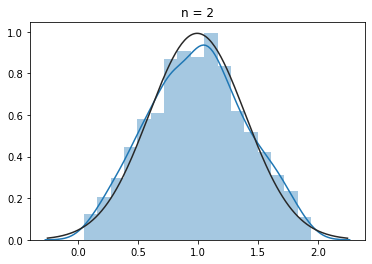

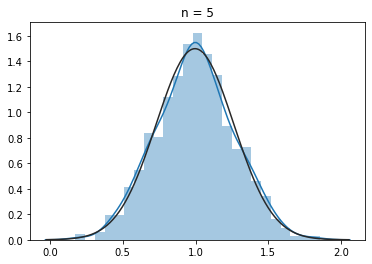

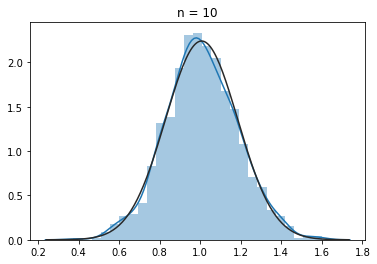

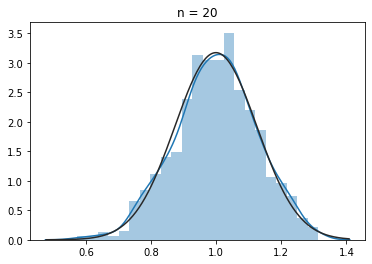

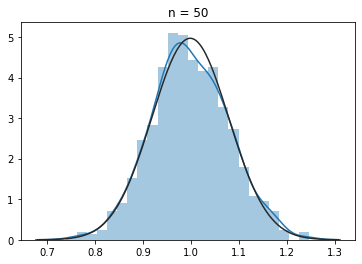

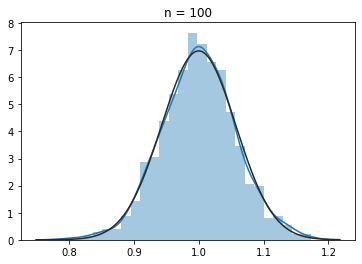

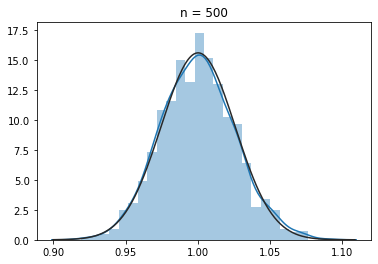

In [11]:
#2) Построить гистограммы (смоделировав по 1000 реализаций) для 2X изобразить на гистограмме нор-
#мальную плотность.
for n in n_tup:
    sample = []
    for i in range(1000): 
        r = sps.uniform.rvs(scale=TETA, size=n)
        sample.append(2*np.mean(r))
    sns.distplot(sample, fit=sps.norm)
    plt.title('n = ' + str(n))
    plt.show()

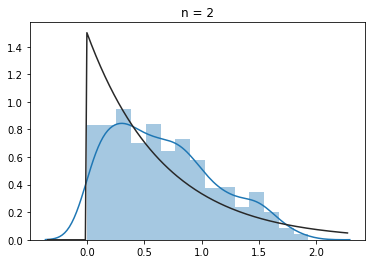

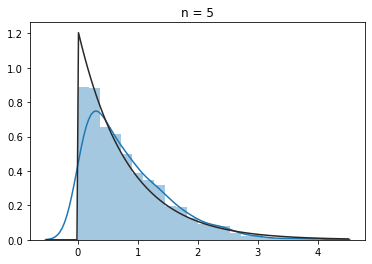

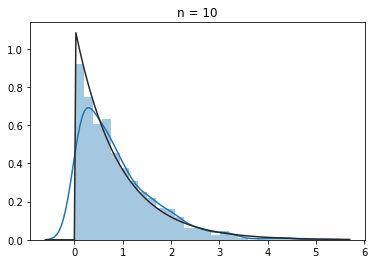

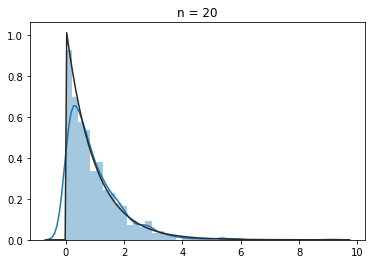

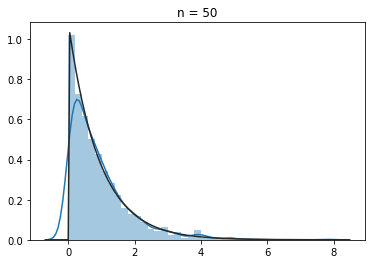

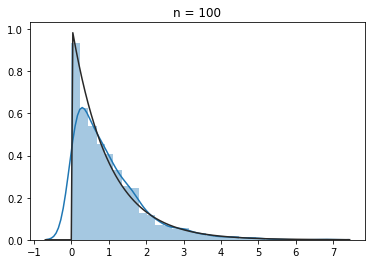

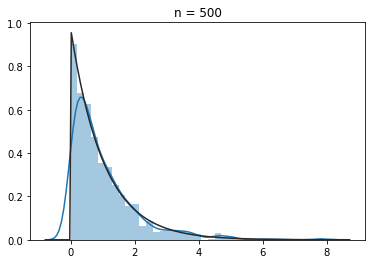

In [5]:
#3) Построить гистограммы (смоделировав по 1000 реализаций) для n(X(n) − θ), сравнить с экспоненци-
#альной плотностью.
for n in n_tup:
    sample = uni_max.rvs(n, size=1000) 
    sample = n*(TETA - sample)
    sns.distplot(sample, fit=sps.expon)
    plt.title('n = ' + str(n))
    plt.show()

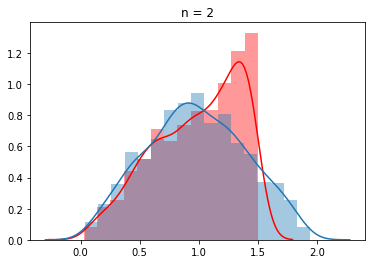

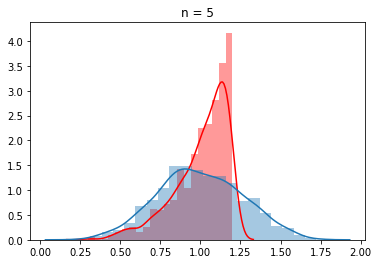

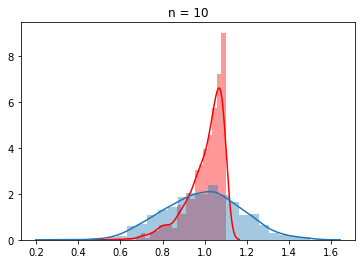

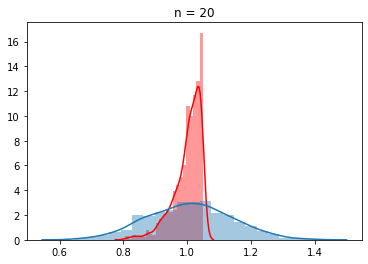

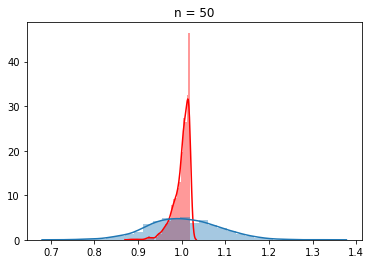

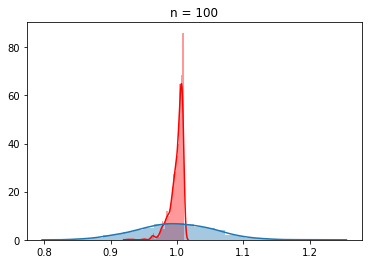

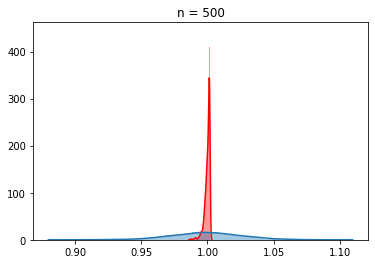

In [6]:
#4) Сравнить, какая из оценок ((n + 1)/n)X(n) и 2X чаще оказывается ближе к θ при разных n, смоде-
#лировав для этого по 1000 реализаций (для каждого n).
for n in n_tup:
    samp = []
    sample = []
    sample = uni_max.rvs(n, size=1000)
    sample = ((n+1)/n) * sample
    sns.distplot(sample, color='r')
    for i in range(1000): 
        r = sps.uniform.rvs(scale=TETA, size=n)
        samp.append(2*np.mean(r))
    sns.distplot(samp)
    plt.title('n = ' + str(n))
    plt.show()

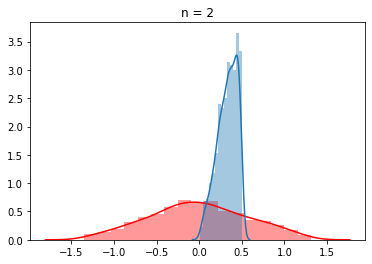

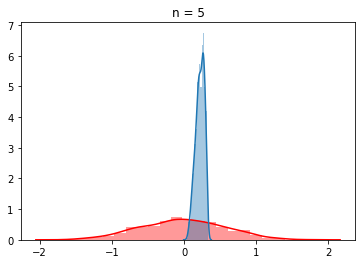

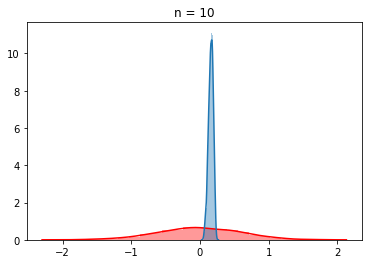

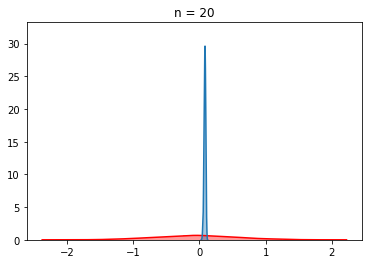

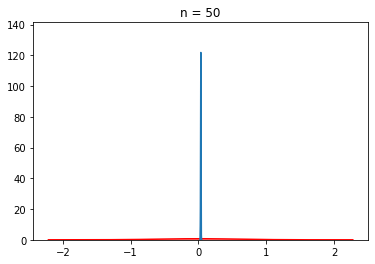

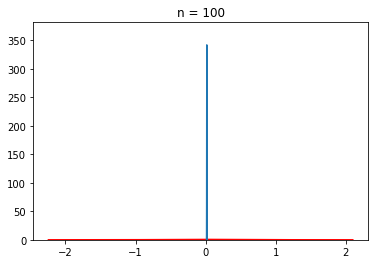

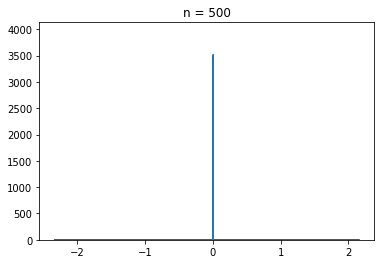

In [10]:
#5) Изобразить гистограммы √n(2X − θ) и √n(2Xα − θ) на одном графике, сравнить разбросы. Здесь Xα – усеченное среднее
from math import floor 
alph = 0.3
for n in n_tup:
    k = floor(alph * n)
    sample = []
    samp = []
    for i in range(1000):
        S = 0
        r = sps.uniform.rvs(scale=TETA, size=n)
        sample.append((2*np.mean(r)-TETA)*(n)**(0.5))
        r.sort()
        for j in range(k, n-k):
            S =+ r[j]
        samp.append(S/(n-2*k))
    sns.distplot(sample, color='r')
    sns.distplot(samp)
    plt.title('n = ' + str(n))
    plt.show()
        